In [1]:
import sys
sys.path.append('..')
from MPRA_predict.utils import *

In [4]:
subprocess.run([
    'python', 'train_scripts/test_1110.py', 
    '-s', 'saved/1111_Gosai_MPRA_MyResTrans_seq_Sei_VEF/1110_135744/', 
    '-c', 'configs/config_1111_Gosai_MPRA_MyResTrans_seq_Sei_VEF_TFBU.yaml',
    '-o', 'TFBU_MPRA_pred.npy'],
    cwd='..'
)

use new config: configs/config_1111_Gosai_MPRA_MyResTrans_seq_Sei_VEF_TFBU.yaml


100%|██████████| 5/5 [00:01<00:00,  3.44it/s]


CompletedProcess(args=['python', 'train_scripts/test_1110.py', '-s', 'saved/1111_Gosai_MPRA_MyResTrans_seq_Sei_VEF/1110_135744/', '-c', 'configs/config_1111_Gosai_MPRA_MyResTrans_seq_Sei_VEF_TFBU.yaml', '-o', 'TFBU_MPRA_pred.npy'], returncode=0)

In [9]:
subprocess.run([
    'python', 'train_scripts/test_1110.py', 
    '-s', 'saved/1110_Gosai_MPRA_MyResTrans_seq/1110_055401/', 
    '-c', 'configs/config_1110_Gosai_MPRA_MyResTrans_seq_TFBU.yaml',
    '-o', 'TFBU_MPRA_pred.npy'],
    cwd='..'
)

use new config: configs/config_1110_Gosai_MPRA_MyResTrans_seq_TFBU.yaml


100%|██████████| 5/5 [00:00<00:00,  5.30it/s]


CompletedProcess(args=['python', 'train_scripts/test_1110.py', '-s', 'saved/1110_Gosai_MPRA_MyResTrans_seq/1110_055401/', '-c', 'configs/config_1110_Gosai_MPRA_MyResTrans_seq_TFBU.yaml', '-o', 'TFBU_MPRA_pred.npy'], returncode=0)

In [19]:
cell_types = ['HepG2', 'HEK293T', 'Jurkat', 'PANC-1', 'HeLa-S3']

In [20]:
MPRA_df = pd.read_csv('../data/TFBU_MPRA/TFBU_MPRA.tsv', sep='\t')
MPRA_df

,id,seq,HepG2,HEK293T,Jurkat,PANC-1,HeLa-S3,seq_168bp
0,0.7488720799999999_ARNT2_pos_00_chr17_43361125...,AACTGGCCGCTTGACGCGGATTTAAGCGTGTAAACGCAACACACAA...,-0.520,-0.517,0.460,-0.583,-0.871,CGGATTTAAGCGTGTAAACGCAACACACAACCTAGGAGGTCAGTAA...
1,0.7244516230000001_ARNT2_pos_00_chr3_190424655...,AACTGGCCGCTTGACGTCGCCTCCCTCAGACTCTGCACCCGCCACA...,-0.651,-1.240,-1.899,-0.526,-0.428,TCGCCTCCCTCAGACTCTGCACCCGCCACAACGTCTGGCTAACTTT...
2,0.697715514_ARNT2_pos_00_chr20_46174909_461750...,AACTGGCCGCTTGACGCGAAGTCGTAGAGGCTCCGCAGCGCCGACA...,-0.744,0.013,-0.262,-0.675,-0.663,CGAAGTCGTAGAGGCTCCGCAGCGCCGACATGTCGTAGGCTTCGGT...
3,0.6746311209999999_ARNT2_pos_00_chr20_31968460...,AACTGGCCGCTTGACGTTTGGTCCGGAAGGCGCCGGCGCTGTCCTT...,-1.642,-1.575,-1.819,-1.600,-0.599,TTTGGTCCGGAAGGCGCCGGCGCTGTCCTTGGTGCTGATGGCGGCT...
4,0.664452299_ARNT2_pos_00_chr22_41666645_416668...,AACTGGCCGCTTGACGCGCGATGGCCGCGGTAGAAGTCAAGCGCCA...,0.099,-0.887,-0.789,-0.577,-0.952,CGCGATGGCCGCGGTAGAAGTCAAGCGCCAGAGGGCACTCCATGCG...
...,...,...,...,...,...,...,...,...
17995,verified_sequence_51,AACTGGCCGCTTGACGCCGAAGTTGGCGCCTGCGGTGCGGCCGCCG...,-0.499,-0.666,-0.684,0.073,-0.202,CCGAAGTTGGCGCCTGCGGTGCGGCCGCCGCTTGCCGCCGAATACG...
17996,verified_sequence_52,AACTGGCCGCTTGACGCGGCGCCGGCGCGGCGTGGTACCGTAAGCC...,-0.569,-0.876,-0.942,0.286,-0.145,CGGCGCCGGCGCGGCGTGGTACCGTAAGCCGATTCCGAATCGCGGA...
17997,verified_sequence_53,AACTGGCCGCTTGACGTACTTGAGCCCAGGAGTTGAGACCAGCCTA...,-0.313,-2.134,NaN,-1.650,-1.444,TACTTGAGCCCAGGAGTTGAGACCAGCCTAAGCAATATAGTGAGAC...
17998,verified_sequence_54,AACTGGCCGCTTGACGCCCTACACACATACAGCCTCCCTCATTATC...,-1.263,-2.604,-2.508,-1.932,-0.828,CCCTACACACATACAGCCTCCCTCATTATCAGCATTCCCCACCAGA...


In [21]:
y_pred = np.load('../saved/1111_Gosai_MPRA_MyResTrans_seq_Sei_VEF/1110_135744/TFBU_MPRA_pred.npy')
cols = [f'{cell_type}_pred' for cell_type in cell_types]
MPRA_df[cols] = y_pred

In [ ]:
y_pred = np.load('../saved/1110_Gosai_MPRA_MyResTrans_seq/1110_055401/TFBU_MPRA_pred.npy')
MPRA_df['mean_pred'] = y_pred.mean(axis=1)

In [24]:
pearson_df = pd.DataFrame()
for ct1 in cell_types:
    for ct2 in cell_types+['mean']:
        x = MPRA_df[f'{ct1}']
        y = MPRA_df[f'{ct2}_pred']
        r, p = pearson(x, y)
        pearson_df.loc[f'{ct1}', f'{ct2}_pred'] = r
print(pearson_df)

         HepG2_pred  HEK293T_pred  Jurkat_pred  PANC-1_pred  HeLa-S3_pred  mean_pred
HepG2         0.757         0.723        0.709        0.722         0.729      0.752
HEK293T       0.766         0.782        0.762        0.760         0.765      0.757
Jurkat        0.729         0.730        0.740        0.723         0.739      0.751
PANC-1        0.705         0.708        0.713        0.724         0.728      0.740
HeLa-S3       0.642         0.628        0.635        0.642         0.660      0.666


In [25]:
MPRA_df[cell_types] = (MPRA_df[cell_types] - MPRA_df[cell_types].mean()) / MPRA_df[cell_types].std()

In [26]:
MPRA_df.describe()

,HepG2,HEK293T,Jurkat,PANC-1,HeLa-S3,HepG2_pred,HEK293T_pred,Jurkat_pred,PANC-1_pred,HeLa-S3_pred,mean_pred
count,16911.000,16942.000,16106.000,16949.000,16795.000,18000.000,18000.000,18000.000,18000.000,18000.000,18000.000
mean,-0.000,-0.000,0.000,-0.000,0.000,0.758,0.720,0.719,0.709,0.748,1.589
std,1.000,1.000,1.000,1.000,1.000,1.289,1.285,1.285,1.262,1.302,1.554
min,-1.603,-2.112,-3.040,-2.388,-3.542,-2.693,-2.758,-2.617,-2.407,-2.726,-1.848
25%,-0.719,-0.662,-0.647,-0.704,-0.609,-0.166,-0.183,-0.202,-0.194,-0.181,0.384
50%,-0.358,-0.354,-0.232,-0.273,-0.271,0.368,0.332,0.300,0.326,0.340,1.212
75%,0.434,0.299,0.430,0.452,0.295,1.321,1.262,1.281,1.248,1.322,2.432
max,5.607,7.365,4.858,10.823,13.317,6.998,6.922,6.736,7.031,7.012,7.389


In [34]:
data_split_dict = {}

data_split_dict['total'] = np.ones(len(MPRA_df), dtype=bool)

for cell_type in cell_types:
    ref_mean = MPRA_df[cell_types].mean(axis=1)
    diff = (MPRA_df[cell_type] - ref_mean).abs()
    threshold = np.percentile(diff.dropna(), 90)
    data_split_dict[f'{cell_type}_specific'] = diff > threshold

for key in data_split_dict:
    print(key, data_split_dict[key].sum())

keys = list(data_split_dict.keys())
for k1 in keys:
    for k2 in keys:
        data_split_dict[f'{k1}+{k2}'] = data_split_dict[k1] & data_split_dict[k2]

total 18000
HepG2_specific 1691
HEK293T_specific 1695
Jurkat_specific 1611
PANC-1_specific 1695
HeLa-S3_specific 1680


In [35]:
for data_split in ['total', 'specific']:
    pearson_df = pd.DataFrame()
    for c1 in cell_types:
        for c2 in cell_types+['mean']:
            if data_split == 'specific':
                condition = data_split_dict[f'{c1}_specific']
            elif data_split == 'test+specific':
                condition = data_split_dict[f'{c1}_specific'] & data_split_dict['test']
            else:
                condition = data_split_dict[data_split]
            df = MPRA_df[condition]
            x = df[f'{c1}']
            y = df[f'{c2}_pred']
            r, p = pearson(x, y)
            pearson_df.loc[f'{c1}', f'{c2}_pred'] = r
    print(data_split, len(x))
    print(pearson_df)

total 18000
         HepG2_pred  HEK293T_pred  Jurkat_pred  PANC-1_pred  HeLa-S3_pred  mean_pred
HepG2         0.757         0.723        0.709        0.722         0.729      0.752
HEK293T       0.766         0.782        0.762        0.760         0.765      0.757
Jurkat        0.729         0.730        0.740        0.723         0.739      0.751
PANC-1        0.705         0.708        0.713        0.724         0.728      0.740
HeLa-S3       0.642         0.628        0.635        0.642         0.660      0.666
specific 1680
         HepG2_pred  HEK293T_pred  Jurkat_pred  PANC-1_pred  HeLa-S3_pred  mean_pred
HepG2         0.473         0.397        0.339        0.374         0.361      0.359
HEK293T       0.578         0.666        0.590        0.565         0.550      0.512
Jurkat        0.522         0.521        0.569        0.508         0.537      0.592
PANC-1        0.244         0.255        0.319        0.358         0.334      0.302
HeLa-S3       0.245         0.208      

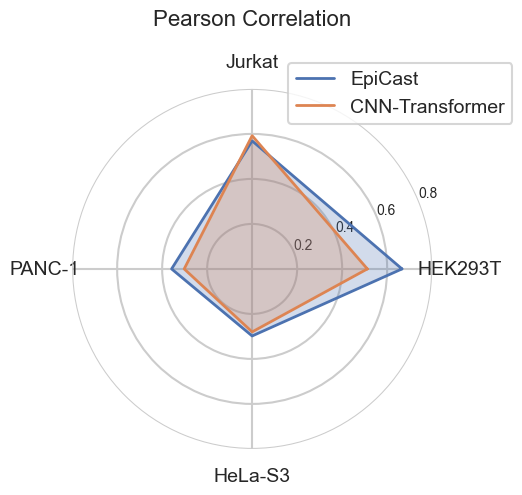

In [66]:
import numpy as np
import matplotlib.pyplot as plt

# 数据
labels = ['HEK293T', 'Jurkat', 'PANC-1', 'HeLa-S3']
models = ['EpiCast', 'CNN-Transformer']

values = np.array([
    [0.666, 0.569, 0.358, 0.298],  # EpiCast
    [0.512, 0.592, 0.302, 0.280],  # CNN-Transformer
])

# 闭合雷达图曲线
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False)
angles = np.concatenate((angles, [angles[0]]))

values_closed = np.concatenate((values, values[:, [0]]), axis=1)

# 绘图
sns.set_theme(style="white", context="talk")
plt.figure(figsize=(6, 6), dpi=100)

ax = plt.subplot(111, polar=True)
plt.subplots_adjust(left=0.2, bottom=0.2, right=0.8, top=0.8)

# 绘制每个模型
for i in range(values.shape[0]):
    ax.plot(angles, values_closed[i], linewidth=2, label=models[i])
    ax.fill(angles, values_closed[i], alpha=0.25)

# 设置雷达图刻度
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=14)
ax.spines['polar'].set_visible(False)

ax.set_ylim(0, 0.8)
ax.set_yticks([0.2, 0.4, 0.6, 0.8])
ax.set_yticklabels(['0.2', '0.4', '0.6', '0.8'], fontsize=10)


# 图例
plt.legend(loc='upper right', fontsize=14, bbox_to_anchor=(1.25, 1.10))
plt.title("Pearson Correlation", fontsize=16, pad=20)

plt.savefig('figures/Gosai_MPRA_EpiCast_TFBU.png', dpi=400)
plt.savefig('figures_pdf/Gosai_MPRA_EpiCast_TFBU.pdf', dpi=400)
plt.show()


              HepG2  HEK293T  Jurkat  PANC-1  HeLa-S3
HepG2_pred    0.758    0.754   0.716   0.701    0.641
HEK293T_pred  0.723    0.779   0.724   0.710    0.628
Jurkat_pred   0.694    0.744   0.737   0.717    0.638
PANC-1_pred   0.720    0.749   0.711   0.730    0.649
HeLa-S3_pred  0.718    0.746   0.726   0.724    0.657


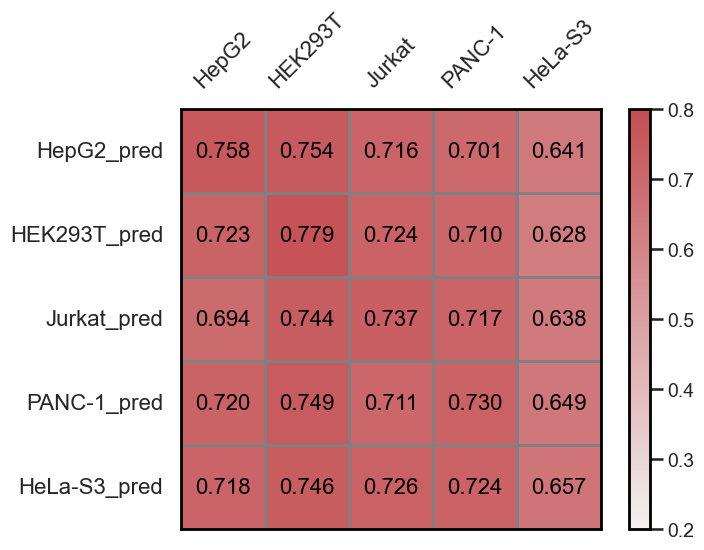

              HepG2  HEK293T  Jurkat  PANC-1  HeLa-S3
HepG2_pred    0.531    0.429   0.425   0.093    0.134
HEK293T_pred  0.449    0.600   0.458   0.110    0.128
Jurkat_pred   0.309    0.397   0.471   0.279    0.328
PANC-1_pred   0.401    0.397   0.398   0.298    0.299
HeLa-S3_pred  0.354    0.372   0.472   0.245    0.309


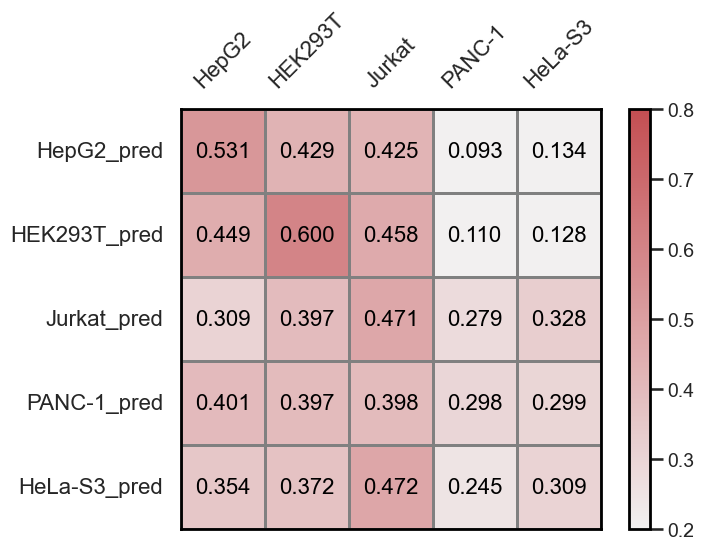

In [30]:
for data_split in ['total', 'diff']:

    pearson_df = pd.DataFrame()
    for ct1 in cell_types:
        for ct2 in cell_types:
            condition = data_split_dict[data_split]
            x = MPRA_df.loc[condition, f'{ct1}_pred']
            y = MPRA_df.loc[condition, f'{ct2}']
            r, p = pearson(x, y)
            pearson_df.loc[f'{ct1}_pred', f'{ct2}'] = r
    print(pearson_df)






    # === 图形配置 ===
    sns.set_theme(style="white", context="talk")  # 统一风格
    fig, ax = plt.subplots(figsize=(8, 6), dpi=100)
    plt.subplots_adjust(left=0.2, bottom=0.1, right=0.9, top=0.8)

    # === 热图绘制 ===
    sns_plot = sns.heatmap(
        pearson_df,
        cmap=sns.color_palette("light:r", as_cmap=True),
        vmin=0.2,
        vmax=0.8,
        square=True,
        annot=True,
        fmt=".3f",
        annot_kws={"size": 16, "color": "black"},
        cbar=True,
        linewidths=1,
        linecolor="gray",
        ax=ax
    )

    # === 坐标轴美化 ===
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position("top")
    ax.tick_params(axis="x", top=False, bottom=False)
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=16, rotation=45)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=16, rotation=0)

    # === 边框设置 ===
    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_linewidth(2)
        spine.set_edgecolor("black")

    # === 色条（colorbar）设置 ===
    cbar = sns_plot.collections[0].colorbar
    cbar.outline.set_linewidth(2)
    cbar.outline.set_edgecolor("black")
    # cbar.set_ticks([0.2, 0.4, 0.6, 0.8, 1.0])
    cbar.ax.tick_params(labelsize=14)

    # === 输出 ===
    plt.savefig(f'figures/TFBU_MPRA_pred_vs_true_{data_split}_heatmap.png', dpi=400)
    plt.show()